<a href="https://colab.research.google.com/github/rosh-pawar1821/Handling_imbalanceddataset/blob/main/imbalance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

import warnings
warnings.filterwarnings("ignore")



In [2]:
pd.options.display.max_colwidth=150

In [3]:
data=pd.read_csv("aug_train.csv")

In [4]:
data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16.0,0.0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135.0,0.0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253.0,0.0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69.0,0.0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211.0,0.0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23.0,0.0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209.0,0.0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51.0,0.0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262.0,0.0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217.0,1.0


In [5]:
data.shape

(298153, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298153 entries, 0 to 298152
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    298153 non-null  int64  
 1   Gender                298153 non-null  object 
 2   Age                   298153 non-null  int64  
 3   Driving_License       298153 non-null  int64  
 4   Region_Code           298153 non-null  float64
 5   Previously_Insured    298153 non-null  int64  
 6   Vehicle_Age           298153 non-null  object 
 7   Vehicle_Damage        298153 non-null  object 
 8   Annual_Premium        298153 non-null  float64
 9   Policy_Sales_Channel  298153 non-null  float64
 10  Vintage               298152 non-null  float64
 11  Response              298152 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 27.3+ MB


In [7]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [8]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,298153.000000,298153.000000,298153.000000,298153.000000,298153.000000,298153.000000,298153.000000,298152.000000,298152.000000
mean,234334.568483,38.549154,0.998142,26.394717,0.489802,30725.625967,111.923221,154.176182,0.163678
std,139642.178091,15.230725,0.043066,13.194896,0.499897,17050.862565,54.296489,83.743272,0.369984
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,114867.000000,25.000000,1.000000,15.000000,0.000000,24547.000000,26.000000,81.000000,0.000000
50%,230368.000000,36.000000,1.000000,28.000000,0.000000,31700.000000,145.000000,154.000000,0.000000
75%,345450.000000,49.000000,1.000000,35.000000,1.000000,39460.000000,152.000000,227.000000,0.000000
max,508144.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
data.dtypes

,0
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


In [11]:
data=data.dropna()

In [12]:
data=data.drop_duplicates()

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data=pd.get_dummies(data,['Gender','Vehicle_Age','Vehicle_Damage'])

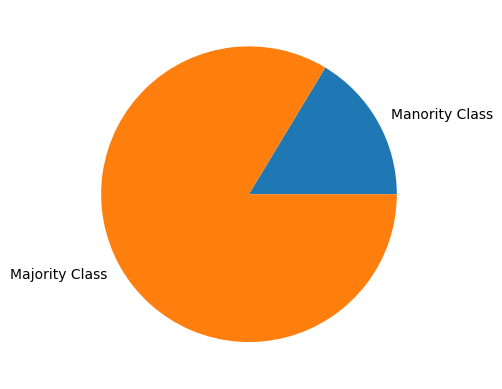

In [27]:
class_division=[data[data['Response']==1].shape[0],data[data['Response']==0].shape[0]]
my_labels=['Manority Class','Majority Class']

plt.pie(class_division,labels=my_labels)
plt.show()


In [28]:
print("proportion of minority class:" + str(round(data[data['Response']==1].shape[0]/data.shape[0]*100))+"%2")

proportion of minority class:16%2


In [29]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['id','Response'])
y=data['Response']

X.columns=['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Vehicle_Age_1_2_Year', 'Vehicle_Age_lessthan_1_Year',
       'Vehicle_Age_greaterthan_2_Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [18]:
print("proportion of minority class in train set:" + str(round(y_train.sum()/len(y_train)*100,2))+"%")
print("proportion of majority class in test set:" + str(round(y_train.sum()/len(y_train)*100,2))+"%")

proportion of minority class in train set:16.37%
proportion of majority class in test set:16.37%


#### Building basic xgboost model

In [19]:
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
test=xgb_classifier.predict(X_test)

In [21]:
print("Accuracy of Test set:", round(accuracy_score(y_test, test) * 100, 2), "%")


Accuracy of Test set: 84.67 %


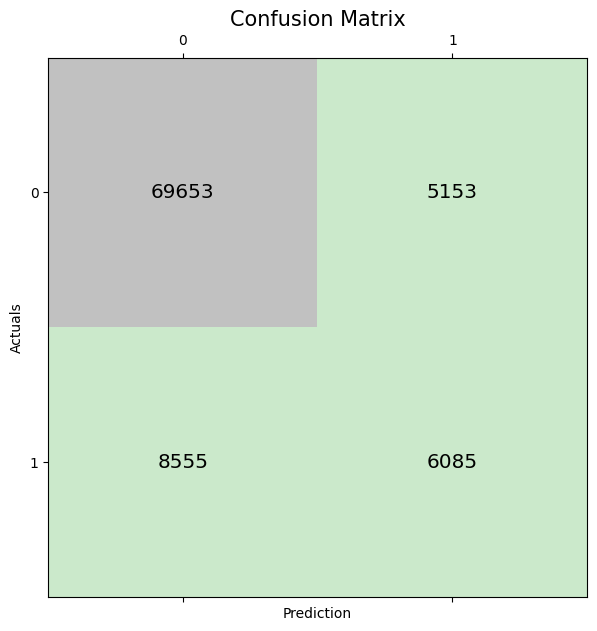

In [23]:
conf_matrix=confusion_matrix(y_true=y_test,y_pred=test)

fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')


plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actuals",fontsize=10)
plt.title("Confusion Matrix", fontsize=15)
plt.show()

In [25]:
precision_original=round(precision_score(y_test,test),4)
recall_original=round(recall_score(y_test,test),4)
F1_score_original=round(f1_score(y_test,test),4)
metrics_original=[precision_original,recall_original,F1_score_original]

original=pd.DataFrame(metrics_original)
original.index=['precision','recall','f1_score']
original.columns=['original dataset']
original['Commnets']=['only 54% of the customers targetted are actually interested in renewing their insurance',
                      'only 41% of the potentially interested customers are being identified',
                      ''
                      ]

original

,original dataset,Commnets
precision,0.5415,only 54% of the customers targetted are actually interested in renewing their insurance
recall,0.4156,only 41% of the potentially interested customers are being identified
f1_score,0.4703,


#### Changing the threshold

In [32]:
cols=['Metrics','Original']
adj_threshold=pd.DataFrame()
adj_threshold['Original']=metrics_original
thresholds=[j/20 for j in range(1,16)]
for i in thresholds:
  y_pred_new_threshold=(xgb_classifier.predict_proba(X_test)[:,1]>=i).astype(int)
  precision_adj_threshold=round(precision_score(y_test,y_pred_new_threshold,average='binary'),4)
  recall_adj_threshold=round(recall_score(y_test,y_pred_new_threshold,average='binary'),4)
  F1_score_adj_threshold=round(f1_score(y_test,y_pred_new_threshold,average='binary'),4)
  metrics_adj_threshold=[precision_adj_threshold,recall_adj_threshold,F1_score_adj_threshold]
  name='threshold' + str(i)
  adj_threshold[name]=metrics_adj_threshold
  cols.append(name)

adj_threshold.index=['precision','recall','F1_score']
adj_threshold=adj_threshold.reset_index()
adj_threshold.columns=cols
adj_threshold.transpose()

adj_threshold1=adj_threshold.transpose().iloc[1:,:]
adj_threshold1.columns=adj_threshold.iloc[:,0]
adj_threshold1

Metrics,precision,recall,F1_score
Original,0.5415,0.4156,0.4703
threshold0.05,0.3596,0.9859,0.527
threshold0.1,0.3894,0.96,0.554
threshold0.15,0.4193,0.9235,0.5768
threshold0.2,0.4451,0.8878,0.593
threshold0.25,0.4666,0.8517,0.6029
threshold0.3,0.4859,0.8138,0.6085
threshold0.35,0.4999,0.7666,0.6051
threshold0.4,0.51,0.7066,0.5924
threshold0.45,0.5218,0.5952,0.5561


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = xgb_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

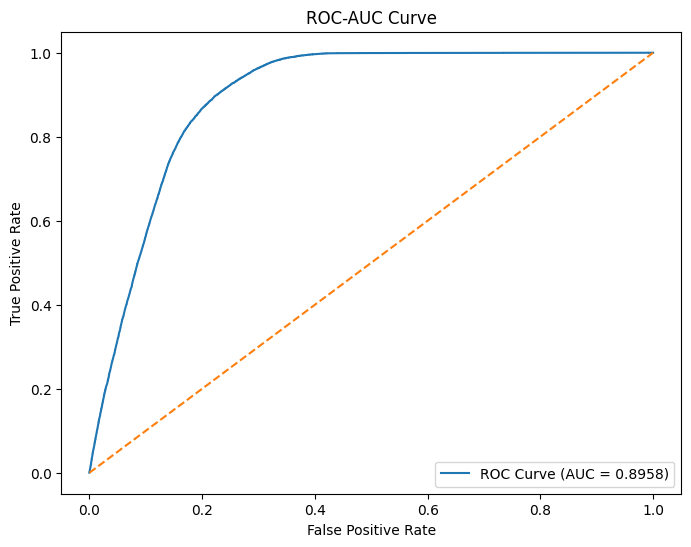

In [34]:
plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {round(auc_score,4)})')
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()

plt.show()

#### new classifier with optimal threshold

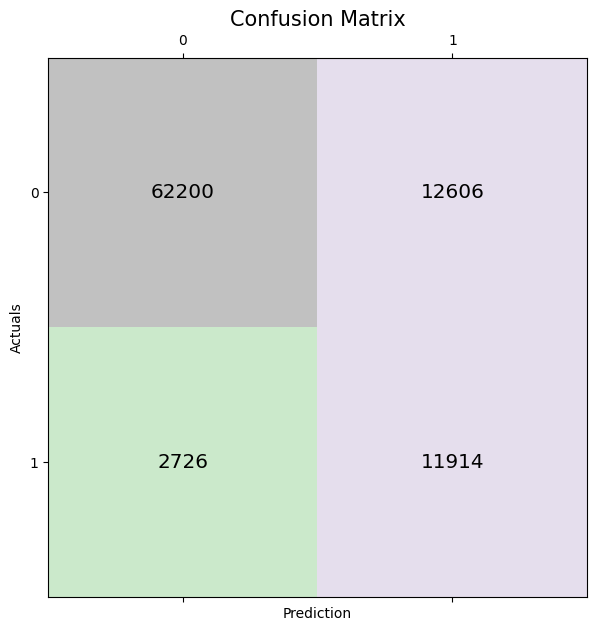

In [36]:
y_pred_new_threshold=(xgb_classifier.predict_proba(X_test)[:,1]>=0.3).astype(int)

conf_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred_new_threshold)
fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')

plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actuals",fontsize=10)
plt.title("Confusion Matrix", fontsize=15)
plt.show()

In [62]:
precision_changedthreshold=round(precision_score(y_test,y_pred_new_threshold),4)
recall_changedthreshold=round(recall_score(y_test,y_pred_new_threshold),4)
F1_score_changedthreshold=round(f1_score(y_test,y_pred_new_threshold),4)
metrics_changedthreshold=[precision_changedthreshold,recall_changedthreshold,F1_score_changedthreshold]

changedthreshold=pd.DataFrame(list(zip(metrics_original,metrics_changedthreshold)))
changedthreshold.index=['precision','recall','f1_score']
changedthreshold.columns=['original dataset','threashold changed dataset']
changedthreshold

,original dataset,threashold changed dataset
precision,0.5415,0.4859
recall,0.4156,0.8138
f1_score,0.4703,0.6085


#### Oversampling

In [38]:
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]

upsampled_One=resample(Response_One,replace=True,
                       n_samples=len(Response_Zero),
                       random_state=27)

upsampled=pd.concat([Response_Zero,upsampled_One])

In [39]:
y_train.value_counts()

,count
Response,
0.0,174545
1.0,34161


In [40]:
upsampled['Response'].value_counts()

,count
Response,
0.0,174545
1.0,174545


In [44]:
X_train_upsampled=upsampled.drop(columns=['Response'])
y_train_upsampled=upsampled['Response']

xgb_upsampled=xgb.XGBClassifier()

xgb_upsampled.fit(X_train_upsampled,y_train_upsampled)

train_upsampled=xgb_upsampled.predict(X_train_upsampled)
test_upsampled=xgb_upsampled.predict(X_test)

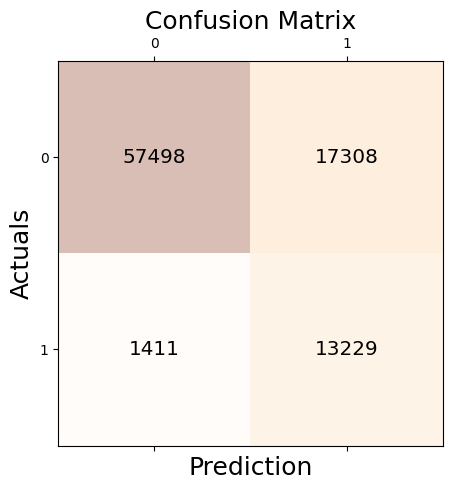

In [46]:
conf_matrix=confusion_matrix(y_true=y_test,y_pred=test_upsampled)

fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix,cmap=plt.cm.Oranges,alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')

plt.xlabel("Prediction", fontsize=18)
plt.ylabel("Actuals",fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

In [63]:
precision_upsampled=round(precision_score(y_test,test_upsampled),4)
recall_upsampled=round(recall_score(y_test,test_upsampled),4)
F1_score_upsampled=round(f1_score(y_test,test_upsampled),4)
metrics_upsampled=[precision_upsampled,recall_upsampled,F1_score_upsampled]

upsampled=pd.DataFrame(list(zip(metrics_original,metrics_changedthreshold,metrics_upsampled)))
upsampled.index=['precision','recall','f1_score']
upsampled.columns=['original dataset','threashold=0.3','upsampled dataset']
upsampled

,original dataset,threashold=0.3,upsampled dataset
precision,0.5415,0.4859,0.4332
recall,0.4156,0.8138,0.9036
f1_score,0.4703,0.6085,0.5857


#### Undersampling

In [55]:
downsampled_Zero=resample(Response_Zero,
                     replace=False,
                     n_samples=len(Response_One),
                     random_state=27)
downsampled=pd.concat([downsampled_Zero,Response_One])

In [56]:
y_train.value_counts()

,count
Response,
0.0,174545
1.0,34161


In [57]:
downsampled['Response'].value_counts()

,count
Response,
0.0,34161
1.0,34161


In [58]:
X_train_downsampled=downsampled.drop(columns=['Response'])
y_train_downsampled=downsampled['Response']

xgb_downsampled=xgb.XGBClassifier()

xgb_downsampled.fit(X_train_downsampled,y_train_downsampled)

train_downsampled=xgb_downsampled.predict(X_train_downsampled)
test_downsampled=xgb_downsampled.predict(X_test)

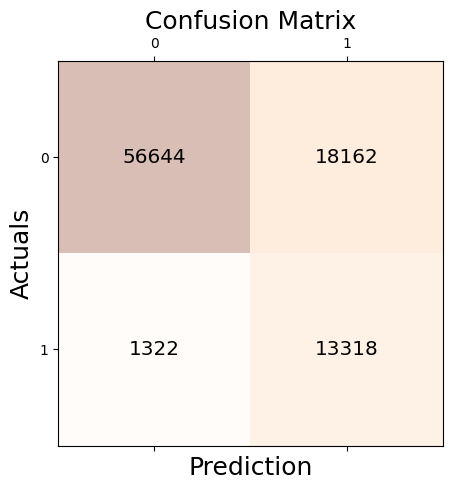

In [59]:
conf_matrix=confusion_matrix(y_true=y_test,y_pred=test_downsampled)

fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix,cmap=plt.cm.Oranges,alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')

plt.xlabel("Prediction", fontsize=18)
plt.ylabel("Actuals",fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

In [65]:
precision_downsampled=round(precision_score(y_test,test_downsampled),4)
recall_downsampled=round(recall_score(y_test,test_downsampled),4)
F1_score_downsampled=round(f1_score(y_test,test_downsampled),4)
metrics_downsampled=[precision_downsampled,recall_downsampled,F1_score_downsampled]

upsampled=pd.DataFrame(list(zip(metrics_original,metrics_changedthreshold,metrics_upsampled,metrics_downsampled)))
upsampled.index=['precision','recall','f1_score']
upsampled.columns=['original dataset','threashold=0.3','upsampled dataset','downsampled']
upsampled

,original dataset,threashold=0.3,upsampled dataset,downsampled
precision,0.5415,0.4859,0.4332,0.4231
recall,0.4156,0.8138,0.9036,0.9097
f1_score,0.4703,0.6085,0.5857,0.5775
